## LetsGrowMore Internship (November 2021)

### Intermediate Level Task 4 Prediction Using Decision Tree Algorithm

### Author: Yash Trimbake

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading the Dataset

In [2]:
df = pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Inspecting Data

In [3]:
print("Number of rows in the dataset :", df.shape[0])
print("Number of columns in the dataset :", df.shape[1])

Number of rows in the dataset : 150
Number of columns in the dataset : 6


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [30]:
df.isnull().sum()  #Checking for Null Values

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

##### There are no null values present in the dataset. So no need of handling the null values

In [6]:
#statistucal summary 
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Extracting Useful Information

In [7]:
data = df[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']]
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Visualize the data

<AxesSubplot:xlabel='Species', ylabel='count'>

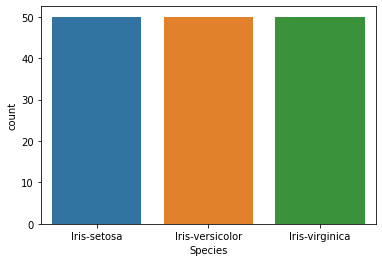

In [8]:
sns.countplot(data['Species'])

<AxesSubplot:ylabel='Species'>

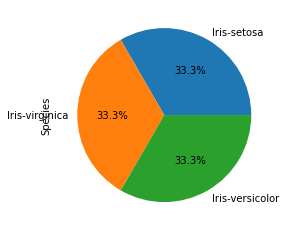

In [9]:
data['Species'].value_counts().plot(kind='pie', autopct="%.1f%%")

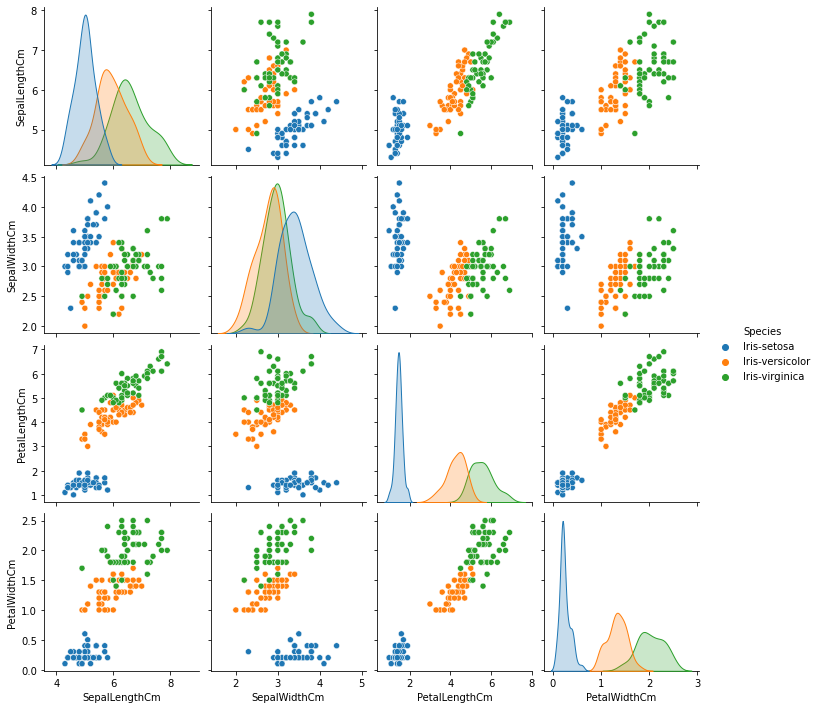

In [10]:
sns.pairplot(data, hue='Species');

<AxesSubplot:>

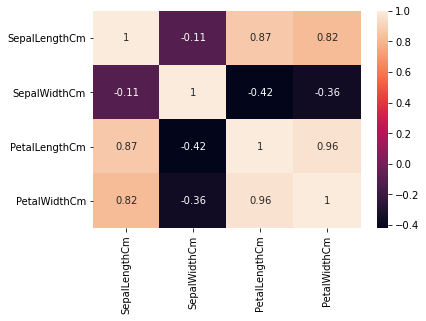

In [11]:
sns.heatmap(data.corr(), annot=True)

### Data Preprocessing

In [12]:
# Label encode the Target Column
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
data['Species'] = lb.fit_transform(data['Species'])
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [13]:
df['Species'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

### Train and Test Data (Split data)

In [14]:
X = data.drop(["Species"], axis=1)
y = data["Species"]

In [15]:
from sklearn.model_selection import train_test_split
train , test = train_test_split(data,test_size=0.2,random_state=0)
print('Shape of training data : ', train.shape)
print('Shape of testing data', test.shape)

Shape of training data :  (120, 5)
Shape of testing data (30, 5)


In [16]:
train_x = train.drop(columns=['Species'],axis=1)
train_y = train['Species']

test_x = test.drop(columns=['Species'],axis=1)
test_y = test['Species']

In [17]:
train_x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [18]:
train_y.head()

137    2
84     1
27     0
127    2
132    2
Name: Species, dtype: int32

### Decision Tree Algorithm

In [19]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt = DecisionTreeClassifier()
dt.fit(train_x,train_y)

DecisionTreeClassifier()

In [20]:
y_pred = dt.predict(test_x)

In [21]:
pred_dt_test = dt.predict(test_x)
pred_dt_train = dt.predict(train_x)

In [22]:
print("Test Accuracy: ", accuracy_score(test_y, pred_dt_test))
print("Training Score: ", dt.score(train_x, train_y))
print("\nConfusion matrix: \n", confusion_matrix(test_y,y_pred))
print("\nClassification Report \n",classification_report(test_y, y_pred))

Test Accuracy:  1.0
Training Score:  1.0

Confusion matrix: 
 [[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]

Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



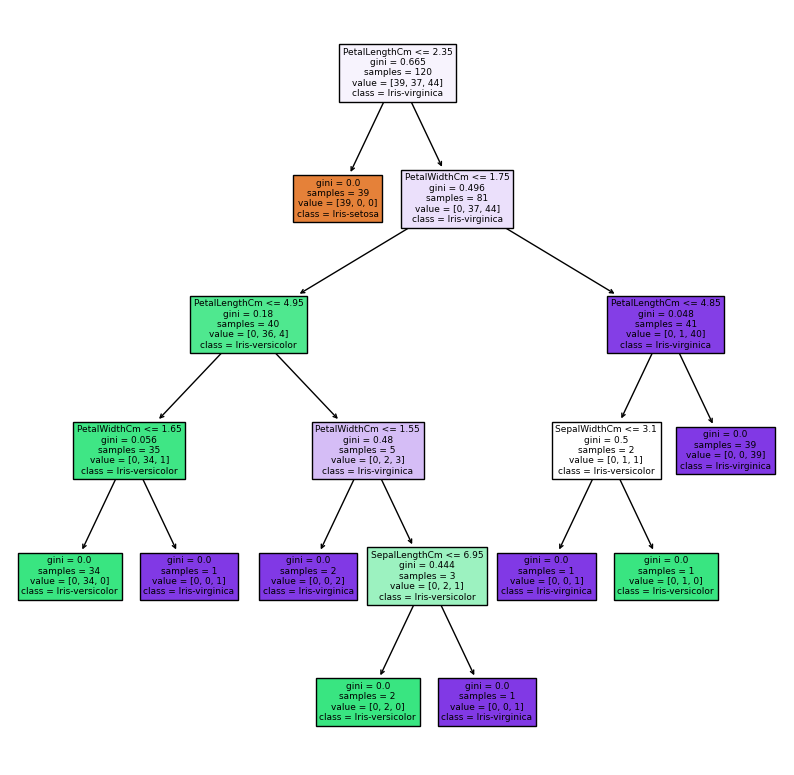

In [23]:
from sklearn import tree 
feature =['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
target =['Iris-setosa','Iris-versicolor','Iris-virginica']
fig,ax= plt.subplots(nrows=1,ncols=1,figsize=(10,10),dpi=100)
tree.plot_tree(dt, feature_names=feature, class_names=target, filled=True);